In [1]:
%reset -f

In [2]:
import numpy as np
from skimage import io, feature, filters
import glob
import matplotlib.pyplot as plt

In [3]:
# Get list of image files
image_files = glob.glob('C:/Users/nikos/tif_files/*.tif')

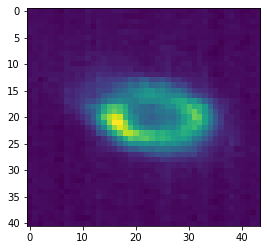

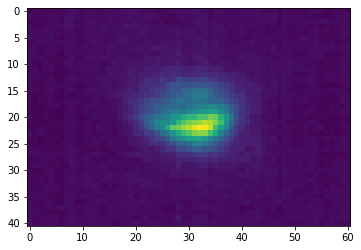

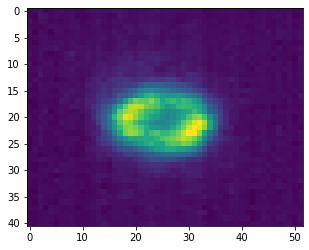

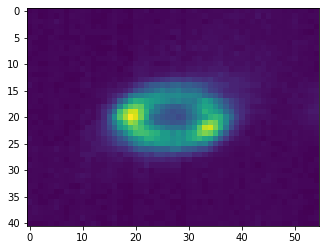

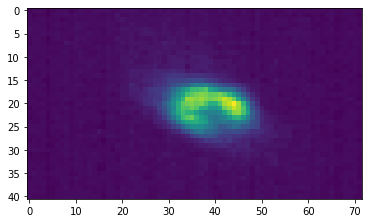

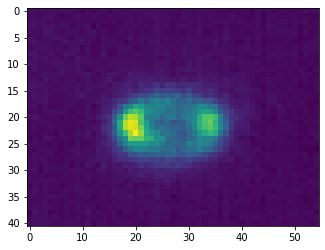

In [4]:
for image_file in image_files:
    image = io.imread(image_file)

    # Display the image
    plt.imshow(image)
    plt.show()

Diameter of FtsZ-ring in image C:/Users/nikos/tif_files\ROI_1.tif: 15.033296378372908


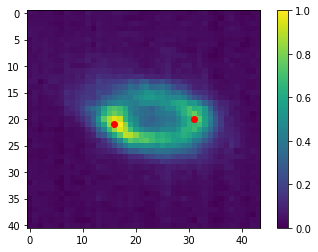

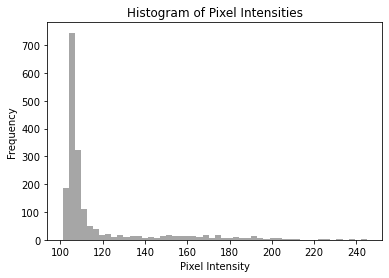

Diameter of FtsZ-ring in image C:/Users/nikos/tif_files\ROI_2.tif: 23.600847442411894


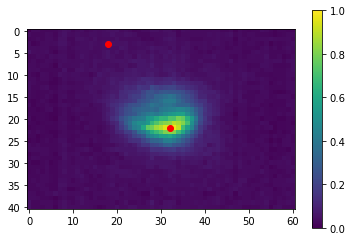

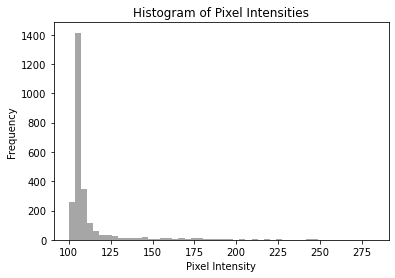

Diameter of FtsZ-ring in image C:/Users/nikos/tif_files\ROI_3.tif: 12.36931687685298


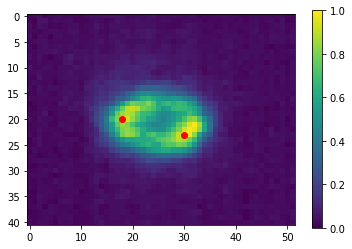

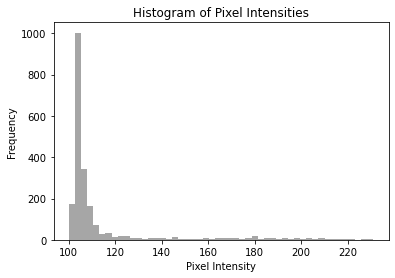

Diameter of FtsZ-ring in image C:/Users/nikos/tif_files\ROI_4.tif: 15.132745950421556


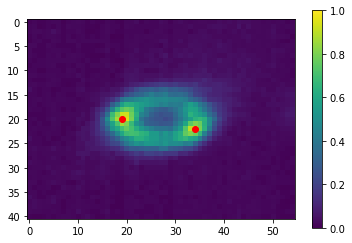

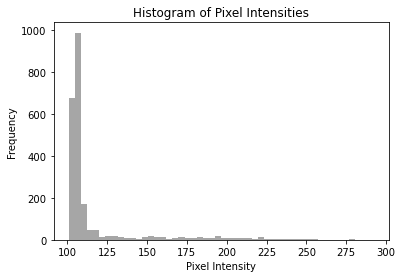

Diameter of FtsZ-ring in image C:/Users/nikos/tif_files\ROI_5.tif: 9.055385138137417


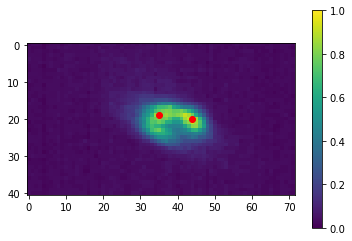

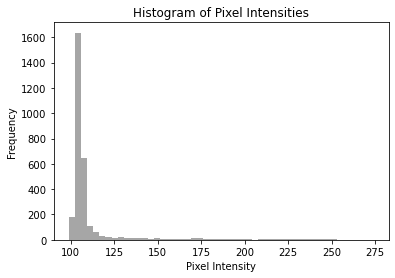

Diameter of FtsZ-ring in image C:/Users/nikos/tif_files\ROI_6.tif: 14.142135623730951


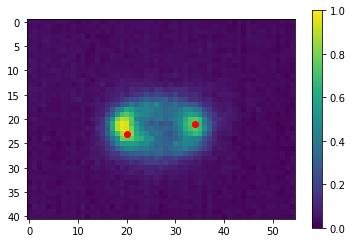

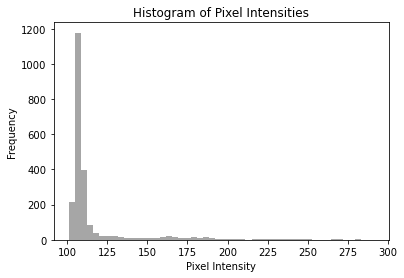

In [5]:
for image_file in image_files:
    image = io.imread(image_file)

    # Threshold the image to create a binary image
    threshold = filters.threshold_otsu(image)
    binary = image > threshold

    # Apply the binary image as a mask to the original image
    masked = np.where(image, image, 0)

    # Find the pixels with peak intensities in the masked image
    peaks = feature.peak_local_max(masked, min_distance=3, num_peaks=2)

    # Compute the distance between the peaks
    distances = np.sqrt(np.sum((peaks[:-1] - peaks[1:])**2, axis=1))

    # Assign the distance as the diameter of the FtsZ-ring
    if distances.any():
        diameter = np.max(distances)
        print('Diameter of FtsZ-ring in image {}: {}'.format(image_file, diameter))
    else:
        print("woops")
        continue

    # Display the masked image with the peaks marked
    plt.imshow(masked)
    plt.scatter(peaks[:, 1], peaks[:, 0], color='r')  # display the peaks as red dots
    plt.colorbar()
    plt.show()

    # Plot a histogram of the pixel intensities
    plt.hist(masked.ravel(), bins=50, color='gray', alpha=0.7)
    plt.title('Histogram of Pixel Intensities')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()